# Load Dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nadisihsetya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset


100%|██████████| 230M/230M [00:01<00:00, 136MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# Import Library

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import Constant

# Describe Data

In [ ]:
df.describe(include=['O'])

,Label
count,225745
unique,2
top,DDoS
freq,128027


In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [ ]:
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
df[' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

# Imputasi

In [ ]:
# Mengganti nilai inf dan -inf dengan NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Imputasi nilai hilang
imputer = SimpleImputer(strategy='mean')
X_numeric = df.select_dtypes(include=[np.number])
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

In [ ]:
# Mengganti nilai hilang pada kolom kategorikal dengan modus
X_categorical = df.select_dtypes(include=['object'])
X_categorical_imputed = pd.DataFrame(imputer.set_params(strategy='most_frequent').fit_transform(X_categorical), columns=X_categorical.columns)

In [ ]:
# Gabungkan kembali kolom numerik dan kategorikal
df_cleaned = pd.concat([X_numeric_imputed, X_categorical_imputed], axis=1)

# Encoding

In [ ]:
# Lakukan encoding pada kolom target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[' Label'])

In [ ]:
# Pisahkan fitur dan target
X = df_cleaned.drop(' Label', axis=1)

# Normalisasi

In [ ]:
# 3. Normalisasi dengan Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# SMOTE

In [ ]:
# 4. SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# Seleksi fitur

In [ ]:
# 5. Seleksi fitur (opsional)
# Pilih 10 fitur terbaik berdasarkan ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = pd.DataFrame(selector.fit_transform(X_resampled, y_resampled), columns=X_scaled.columns[selector.get_support()])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# Split dataset

In [ ]:
# 6. Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.3, random_state=42)

Hasil akhir

In [ ]:
# Hasil akhir
print("Mapping label ke angka:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("Distribusi target setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())

print("Dataset setelah preprocessing:")
print(X_train.head())

Mapping label ke angka:
{'BENIGN': 0, 'DDoS': 1}
Distribusi target setelah SMOTE:
0    128027
1    128027
Name: count, dtype: int64
Dataset setelah preprocessing:
         Destination Port  Bwd Packet Length Max   Bwd Packet Length Mean  \
82690            0.001221               0.000000                 0.000000   
172500           0.001221               0.000000                 0.000000   
96514            0.001221               0.375000                 0.333333   
211686           0.000809               0.005051                 0.010172   
27630            0.001221               0.000000                 0.000000   

         Bwd Packet Length Std   Max Packet Length   Packet Length Mean  \
82690                 0.000000            0.000514             0.003098   
172500                0.000000            0.000514             0.003098   
96514                 0.214504            0.375000             0.600310   
211686                0.000000            0.005051             0.025506   

# Reshape data

In [ ]:
# Ubah data menjadi bentuk 2D untuk CNN
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Verifikasi bentuk data setelah reshaping
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(179237, 10, 1)
(76817, 10, 1)


# Build Model

In [ ]:
# Fungsi untuk membangun model dengan hyperparameter yang dapat disesuaikan
def build_model(learning_rate=0.001, alpha=0.001, dropout_rate=0.3, bias_init_value=0.0, optimizer_choice='adam', input_shape=(100, 1)):
    # Pilih optimizer berdasarkan input
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer must be 'adam' or 'rmsprop'.")

    model = Sequential()

    # Layer konvolusi pertama dengan regularisasi L2 dan bias initializer
    model.add(Conv1D(filters=64,
                     kernel_size=3,
                     activation='relu',
                     kernel_regularizer=l2(alpha),
                     input_shape=input_shape,
                     bias_initializer=Constant(value=bias_init_value)))

    # MaxPooling
    model.add(MaxPooling1D(pool_size=2))

    # Layer konvolusi kedua
    model.add(Conv1D(filters=128,
                     kernel_size=3,
                     activation='relu',
                     kernel_regularizer=l2(alpha),
                     bias_initializer=Constant(value=bias_init_value)))

    # MaxPooling
    model.add(MaxPooling1D(pool_size=2))

    # Dropout layer untuk regularisasi
    model.add(Dropout(rate=dropout_rate))

    # Flatten layer untuk fully connected layer
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(alpha)))

    # Output layer
    model.add(Dense(units=2, activation='softmax'))  # Ganti sesuai jumlah kelas

    # Compile model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Train

In [ ]:
def train_model(model, X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=None):
    # Melatih model dengan data latih
    history = model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
    return history

# Evaluate

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def evaluate_model(model, X_test_cnn, y_test):
    test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
    print(f"Test accuracy: {test_acc}")
    print(f"Test loss: {test_loss}")

    y_pred = model.predict(X_test_cnn)
    y_pred_classes = np.argmax(y_pred, axis=1)

    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    auc_roc = roc_auc_score(y_test, y_pred[:, 1])

    cm = confusion_matrix(y_test, y_pred_classes)
    plot_confusion_matrix(cm, class_names=['Class 0', 'Class 1'])
    plot_roc_curve(y_test, y_pred[:, 1])

    return test_acc, test_loss, precision, recall, f1, auc_roc

# Experiment

## Adam Optimizer

In [ ]:
def print_experiment_results(history, test_loss, test_acc):
    # Mencetak hasil pelatihan (history)
    print("\nTraining History:")
    print("Epochs:", len(history.history['loss']))
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Validation Accuracy:", history.history['val_accuracy'][-1])

    # Mencetak hasil evaluasi
    print(f"Test accuracy: {test_acc}")
    print(f"Test loss: {test_loss}")

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")

In [ ]:
def experiment_with_hyperparameters(learning_rate=0.001, alpha=0.001, dropout_rate=0.3, bias_init_value=0.0, optimizer_choice='adam', X_train_cnn=None, y_train=None, X_test_cnn=None, y_test=None):
    # Bangun model dengan hyperparameter yang telah disesuaikan
    model = build_model(learning_rate=learning_rate, alpha=alpha, dropout_rate=dropout_rate,
                        bias_init_value=bias_init_value, optimizer_choice=optimizer_choice, input_shape=(X_train_cnn.shape[1], 1))

    # Melatih model dengan data latih
    history = train_model(model, X_train_cnn, y_train, epochs=3, batch_size=32, validation_data=(X_test_cnn, y_test))

    # Evaluasi model dengan data uji
    test_loss, test_acc, precision, recall, f1, auc_roc = evaluate_model(model, X_test_cnn, y_test)

    # Mencetak hasil eksperimen
    print(f"Experiment with learning_rate={learning_rate}, alpha={alpha}, dropout_rate={dropout_rate}, "
          f"bias_init_value={bias_init_value}, optimizer={optimizer_choice}")

    # Menampilkan hasil eksperimen
    print_experiment_results(history, test_loss, test_acc)

In [ ]:
from time import time

# Daftar jumlah hidden nodes dan learning rates untuk percobaan
hidden_nodes_list = [20, 40, 60, 80, 100]
learning_rates = [0.001, 0.005, 0.008]

# List untuk menyimpan hasil percobaan
results = []

# Loop untuk semua kombinasi hidden nodes dan learning rates
for hidden_nodes in hidden_nodes_list:
    for lr in learning_rates:
        print(f"Testing with hidden nodes={hidden_nodes}, learning rate={lr}")

        # Fungsi untuk membangun model dengan jumlah hidden nodes tertentu
        def build_model_with_hidden_nodes(hidden_units):
            return build_model(learning_rate=lr, alpha=0.001, dropout_rate=0.3,
                               bias_init_value=0.0, optimizer_choice='adam', input_shape=(X_train_cnn.shape[1], 1))

        # Mulai pencatatan waktu
        start_time = time()

        # Bangun dan latih model
        model = build_model_with_hidden_nodes(hidden_units=hidden_nodes)
        history = train_model(model, X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

        # Hitung waktu training
        elapsed_time = time() - start_time

        # Ambil akurasi dari hasil training dan validasi
        train_acc = history.history['accuracy'][-1]  # Akurasi terakhir pada training
        val_acc = history.history['val_accuracy'][-1]  # Akurasi terakhir pada validasi

        # Hitung akurasi pada data pengujian
        test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)  # Evaluasi data pengujian

        # Simpan hasil
        results.append({
            "hidden_nodes": hidden_nodes,
            "learning_rate": lr,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "test_acc": test_acc,
            "time": elapsed_time
        })

# Cetak hasil percobaan dengan format tabel
print(f"\n{'Hidden Nodes':<15}{'Learning Rate':<15}{'Train Accuracy':<15}{'Val Accuracy':<15}{'Test Accuracy':<15}{'Time (s)':<10}")
print("="*85)

for result in results:
    print(f"{result['hidden_nodes']:<15}{result['learning_rate']:<15}{result['train_acc']:<15.4f}{result['val_acc']:<15.4f}{result['test_acc']:<15.4f}{result['time']:<10.2f}")

Testing with hidden nodes=20, learning rate=0.008
Epoch 1/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9411 - loss: 0.2034 - val_accuracy: 0.9675 - val_loss: 0.1363
Epoch 2/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9576 - loss: 0.1570 - val_accuracy: 0.9616 - val_loss: 0.1481
Epoch 3/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9596 - loss: 0.1525 - val_accuracy: 0.9642 - val_loss: 0.1394
Epoch 4/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9599 - loss: 0.1477 - val_accuracy: 0.9634 - val_loss: 0.1359
Epoch 5/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9602 - loss: 0.1493 - val_accuracy: 0.9525 - val_loss: 0.1690
Epoch 6/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9591 - loss: 0.1519 - val_accuracy: 0.9659 - val_loss: 0.1334
Epoch 7/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9610 - loss: 0.1473 - val_accuracy: 0.9676 - val_loss: 0.1280
Epoch 8/10
5602/5602 ━━━━━━━━━━━━

Confusion Matrix, Accuracy, Precision, Recall, F1-Score, and AUC-ROC

Epoch 1/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9327 - loss: 0.2314 - val_accuracy: 0.9672 - val_loss: 0.1293
Epoch 2/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9643 - loss: 0.1339 - val_accuracy: 0.9686 - val_loss: 0.1295
Epoch 3/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9647 - loss: 0.1266 - val_accuracy: 0.9679 - val_loss: 0.1239
Epoch 4/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9653 - loss: 0.1230 - val_accuracy: 0.9677 - val_loss: 0.1147
Epoch 5/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9654 - loss: 0.1214 - val_accuracy: 0.9632 - val_loss: 0.1238
Epoch 6/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9655 - loss: 0.1207 - val_accuracy: 0.9684 - val_loss: 0.1140
Epoch 7/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9662 - loss: 0.1185 - val_accuracy: 0.9678 - val_loss: 0.1137
Epoch 8/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9645 - loss: 0

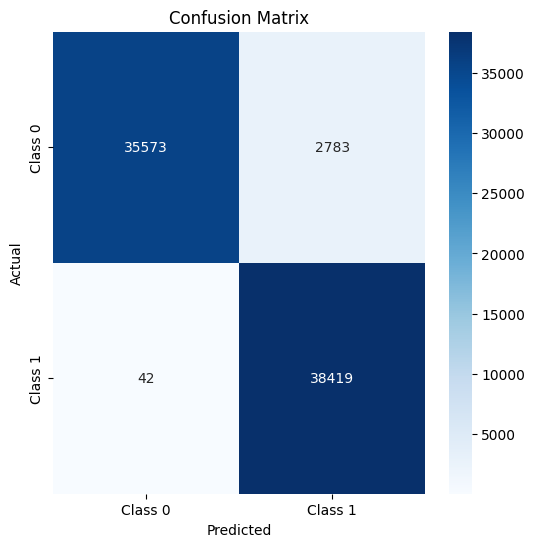

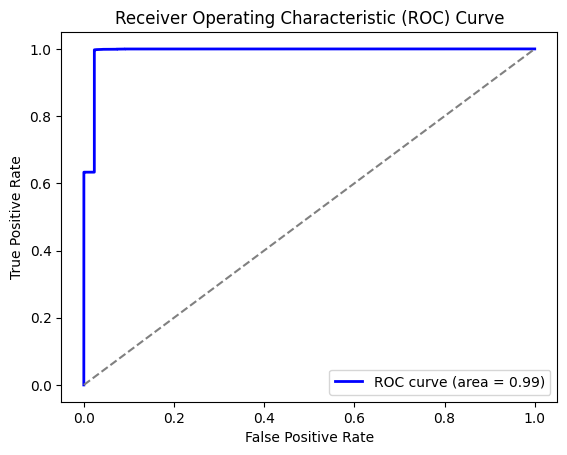

Accuracy: 0.963224286290795
Precision: 0.9324547352070288
Recall: 0.998907984711786
F1-Score: 0.964538116817092
AUC-ROC: 0.9913646518134369


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan parameter terbaik yang telah ditentukan
best_learning_rate = 0.001
best_hidden_nodes = 100

# Bangun model dengan parameter terbaik
best_model = build_model(learning_rate=best_learning_rate, alpha=0.001, dropout_rate=0.3,
                        bias_init_value=0.0, optimizer_choice='adam', input_shape=(X_train_cnn.shape[1], 1))

# Latih model dengan parameter terbaik
history = train_model(best_model, X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluasi model dengan data uji
y_pred = best_model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc_roc = roc_auc_score(y_test, y_pred[:, 1])

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {auc_roc}")

## RMSprop Optimizer

In [ ]:
def print_experiment_results(history, test_loss, test_acc):
    # Mencetak hasil pelatihan (history)
    print("\nTraining History:")
    print("Epochs:", len(history.history['loss']))
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Validation Accuracy:", history.history['val_accuracy'][-1])

    # Mencetak hasil evaluasi
    print(f"Test accuracy: {test_acc}")
    print(f"Test loss: {test_loss}")

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")

In [ ]:
def experiment_with_hyperparameters(learning_rate=0.001, alpha=0.001, dropout_rate=0.3, bias_init_value=0.0, optimizer_choice='rmsprop', X_train_cnn=None, y_train=None, X_test_cnn=None, y_test=None):
    # Bangun model dengan hyperparameter yang telah disesuaikan
    model = build_model(learning_rate=learning_rate, alpha=alpha, dropout_rate=dropout_rate,
                        bias_init_value=bias_init_value, optimizer_choice=optimizer_choice, input_shape=(X_train_cnn.shape[1], 1))

    # Melatih model dengan data latih
    history = train_model(model, X_train_cnn, y_train, epochs=3, batch_size=32, validation_data=(X_test_cnn, y_test))

    # Evaluasi model dengan data uji
    test_loss, test_acc, precision, recall, f1, auc_roc = evaluate_model(model, X_test_cnn, y_test)

    # Mencetak hasil eksperimen
    print(f"Experiment with learning_rate={learning_rate}, alpha={alpha}, dropout_rate={dropout_rate}, "
          f"bias_init_value={bias_init_value}, optimizer={optimizer_choice}")

    # Menampilkan hasil eksperimen
    print_experiment_results(history, test_loss, test_acc)

In [ ]:
from time import time

# Daftar jumlah hidden nodes dan learning rates untuk percobaan
hidden_nodes_list = [20, 40, 60, 80, 100]
learning_rates = [0.001, 0.005, 0.008]

# List untuk menyimpan hasil percobaan
results = []

# Loop untuk semua kombinasi hidden nodes dan learning rates
for hidden_nodes in hidden_nodes_list:
    for lr in learning_rates:
        print(f"Testing with hidden nodes={hidden_nodes}, learning rate={lr}")

        # Fungsi untuk membangun model dengan jumlah hidden nodes tertentu
        def build_model_with_hidden_nodes(hidden_units):
            return build_model(learning_rate=lr, alpha=0.001, dropout_rate=0.3,
                               bias_init_value=0.0, optimizer_choice='rmsprop', input_shape=(X_train_cnn.shape[1], 1))

        # Mulai pencatatan waktu
        start_time = time()

        # Bangun dan latih model
        model = build_model_with_hidden_nodes(hidden_units=hidden_nodes)
        history = train_model(model, X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

        # Hitung waktu training
        elapsed_time = time() - start_time

        # Ambil akurasi dari hasil training dan validasi
        train_acc = history.history['accuracy'][-1]  # Akurasi terakhir pada training
        val_acc = history.history['val_accuracy'][-1]  # Akurasi terakhir pada validasi

        # Hitung akurasi pada data pengujian
        test_loss, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)  # Evaluasi data pengujian

        # Simpan hasil
        results.append({
            "hidden_nodes": hidden_nodes,
            "learning_rate": lr,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "test_acc": test_acc,
            "time": elapsed_time
        })

# Cetak hasil percobaan dengan format tabel
print(f"\n{'Hidden Nodes':<15}{'Learning Rate':<15}{'Train Accuracy':<15}{'Val Accuracy':<15}{'Test Accuracy':<15}{'Time (s)':<10}")
print("="*85)

for result in results:
    print(f"{result['hidden_nodes']:<15}{result['learning_rate']:<15}{result['train_acc']:<15.4f}{result['val_acc']:<15.4f}{result['test_acc']:<15.4f}{result['time']:<10.2f}")

Testing with hidden nodes=20, learning rate=0.008
Epoch 1/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9411 - loss: 0.2034 - val_accuracy: 0.9675 - val_loss: 0.1363
Epoch 2/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9576 - loss: 0.1570 - val_accuracy: 0.9616 - val_loss: 0.1481
Epoch 3/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9596 - loss: 0.1525 - val_accuracy: 0.9642 - val_loss: 0.1394
Epoch 4/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9599 - loss: 0.1477 - val_accuracy: 0.9634 - val_loss: 0.1359
Epoch 5/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9602 - loss: 0.1493 - val_accuracy: 0.9525 - val_loss: 0.1690
Epoch 6/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9591 - loss: 0.1519 - val_accuracy: 0.9659 - val_loss: 0.1334
Epoch 7/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9610 - loss: 0.1473 - val_accuracy: 0.9676 - val_loss: 0.1280
Epoch 8/10
5602/5602 ━━━━━━━━━━━━

Confusion Matrix, Accuracy, Precision, Recall, F1-Score, and AUC-ROC

Epoch 1/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9327 - loss: 0.2314 - val_accuracy: 0.9672 - val_loss: 0.1293
Epoch 2/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9643 - loss: 0.1339 - val_accuracy: 0.9686 - val_loss: 0.1295
Epoch 3/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9647 - loss: 0.1266 - val_accuracy: 0.9679 - val_loss: 0.1239
Epoch 4/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9653 - loss: 0.1230 - val_accuracy: 0.9677 - val_loss: 0.1147
Epoch 5/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9654 - loss: 0.1214 - val_accuracy: 0.9632 - val_loss: 0.1238
Epoch 6/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9655 - loss: 0.1207 - val_accuracy: 0.9684 - val_loss: 0.1140
Epoch 7/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9662 - loss: 0.1185 - val_accuracy: 0.9678 - val_loss: 0.1137
Epoch 8/10
5602/5602 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9645 - loss: 0

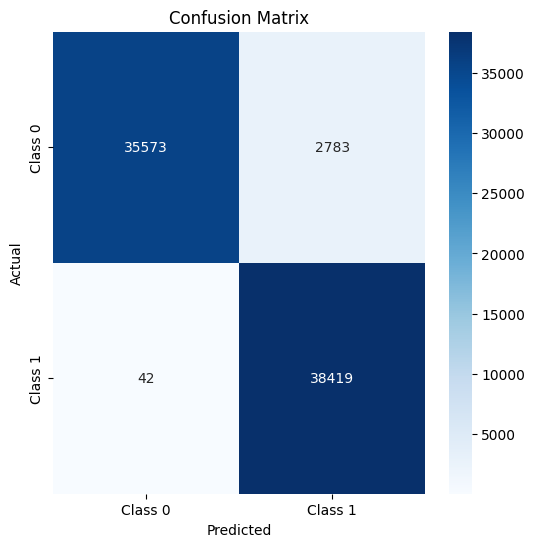

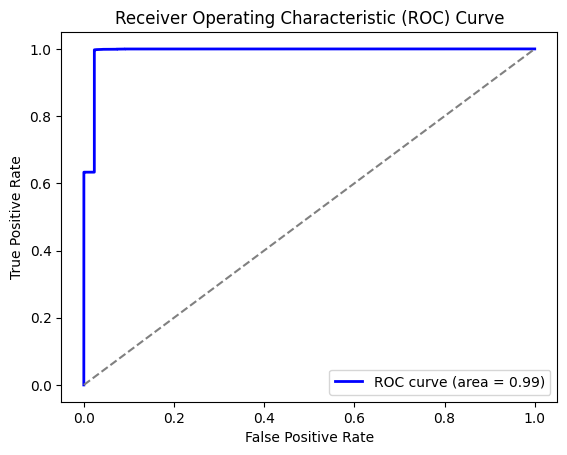

Accuracy: 0.963224286290795
Precision: 0.9324547352070288
Recall: 0.998907984711786
F1-Score: 0.964538116817092
AUC-ROC: 0.9913646518134369


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan parameter terbaik yang telah ditentukan
best_learning_rate = 0.001
best_hidden_nodes = 100

# Bangun model dengan parameter terbaik
best_model = build_model(learning_rate=best_learning_rate, alpha=0.001, dropout_rate=0.3,
                        bias_init_value=0.0, optimizer_choice='rmsprop', input_shape=(X_train_cnn.shape[1], 1))

# Latih model dengan parameter terbaik
history = train_model(best_model, X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluasi model dengan data uji
y_pred = best_model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc_roc = roc_auc_score(y_test, y_pred[:, 1])

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {auc_roc}")